In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [5]:
# Convert target: 1 (pre-diabetes) and 2 (diabetes) → 1
df["Diabetes_binary"] = df["Diabetes_012"].apply(lambda x: 1 if x > 0 else 0)

In [6]:
df.shape

(253680, 23)

In [7]:
df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
Diabetes_binary           int64
dtype: object

In [8]:
# Features & target
X = df.drop(columns=["Diabetes_012", "Diabetes_binary"])
y = df["Diabetes_binary"]
print(X,y)

        HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0          1.0       1.0        1.0  40.0     1.0     0.0   
1          0.0       0.0        0.0  25.0     1.0     0.0   
2          1.0       1.0        1.0  28.0     0.0     0.0   
3          1.0       0.0        1.0  27.0     0.0     0.0   
4          1.0       1.0        1.0  24.0     0.0     0.0   
...        ...       ...        ...   ...     ...     ...   
253675     1.0       1.0        1.0  45.0     0.0     0.0   
253676     1.0       1.0        1.0  18.0     0.0     0.0   
253677     0.0       0.0        1.0  28.0     0.0     0.0   
253678     1.0       0.0        1.0  23.0     0.0     0.0   
253679     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
0                        0.0           0.0     0.0      1.0  ...   
1                        0.0           1.0     0.0      0.0  ...   
2                        0.0           0.0     1.0      0.0  ..

In [9]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

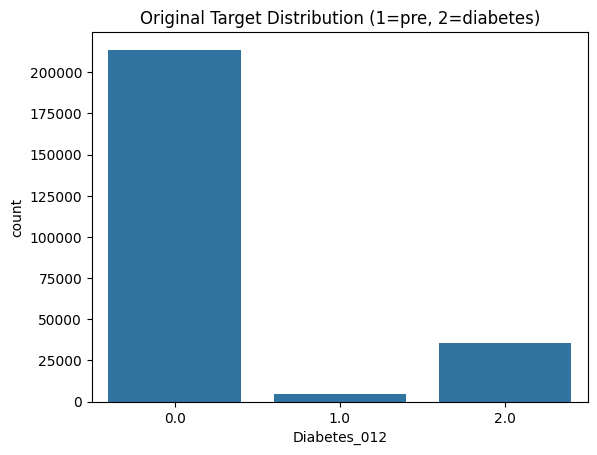

In [10]:
# Target variable distribution
sns.countplot(x="Diabetes_012", data=df)
plt.title("Original Target Distribution (1=pre, 2=diabetes)")
plt.show()



Class is imbalanced

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Pipeline: scaling + RandomForest
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])

# Train
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     42741
           1       0.52      0.22      0.30      7995

    accuracy                           0.84     50736
   macro avg       0.69      0.59      0.61     50736
weighted avg       0.81      0.84      0.82     50736

ROC AUC: 0.7922259324854993
Confusion Matrix:
 [[41148  1593]
 [ 6275  1720]]


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]
    
    # Save results
    results[name] = {
        "y_pred": y_pred,
        "y_prob": y_prob,
        "model": pipeline
    }


In [13]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

for name, res in results.items():
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, res["y_pred"]))
    print("F1 Score:", f1_score(y_test, res["y_pred"]))
    print("ROC AUC:", roc_auc_score(y_test, res["y_prob"]))
    print("Confusion Matrix:\n", confusion_matrix(y_test, res["y_pred"]))
    print("Classification Report:\n", classification_report(y_test, res["y_pred"]))
    print("\n")

=== Logistic Regression ===
Accuracy: 0.8480960264900662
F1 Score: 0.2839357056582737
ROC AUC: 0.817190252459295
Confusion Matrix:
 [[41501  1240]
 [ 6467  1528]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92     42741
           1       0.55      0.19      0.28      7995

    accuracy                           0.85     50736
   macro avg       0.71      0.58      0.60     50736
weighted avg       0.82      0.85      0.82     50736



=== Random Forest ===
Accuracy: 0.8449227373068433
F1 Score: 0.304209409267775
ROC AUC: 0.7922255710724656
Confusion Matrix:
 [[41148  1593]
 [ 6275  1720]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     42741
           1       0.52      0.22      0.30      7995

    accuracy                           0.84     50736
   macro avg       0.69      0.59      0.61     50736
weighted avg       0.81      0.

Accuracy is high for both - class imbalnced so not good
F1 is low - better if it was high for class imbalanced since it would balance catching true diabetics while avoiding false alarms
ROC AUC seems to be good - can separate between both groups well
Matrix - seems to be decent but could always be better to reduce the FN

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

gb = GradientBoostingClassifier(random_state=42)

# scale numeric features
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

gb_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", gb)
])

gb_pipeline.fit(X_train, y_train)

y_pred = gb_pipeline.predict(X_test)
y_prob = gb_pipeline.predict_proba(X_test)[:, 1]

print("=== Gradient Boosting ===")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


=== Gradient Boosting ===
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92     42741
           1       0.57      0.21      0.31      7995

    accuracy                           0.85     50736
   macro avg       0.72      0.59      0.61     50736
weighted avg       0.82      0.85      0.82     50736

ROC AUC: 0.8243975292283281
Confusion Matrix:
 [[41479  1262]
 [ 6289  1706]]


Essentially the same findings for GB

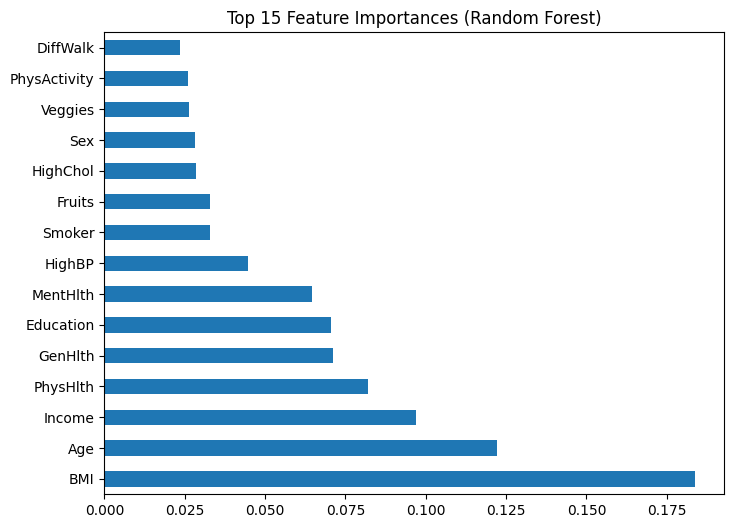

In [15]:
import numpy as np

rf_model = results["Random Forest"]["model"].named_steps["clf"]
importances = rf_model.feature_importances_

feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(15).plot(kind="barh", figsize=(8,6))
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()